<h1 align="center">LOGISTIC REGRESSION WITH TITANIC DATA

<img src="pictures/titanicwillgoonandoneventually-header.jpg" />

***
***
**Bu uygulamada, kaza yapıp batacağını bildiğimiz Titanic gemisinde yolculuk yapmakta olan Jack'in hayatta kalıp kalamayacağını Logistic Regression kullanarak tahmin etmeye çalışacağız.**

***
***
### DATASET AÇIKLAMALARI

<br>**PassengerId**: Yolcu numarası

**Survived**: Gerçekleşen kaza sonucu yolcunun kurtulup kurtulmadığını belirten sınıf etiketi. Bu etiket yalnızca *Train Dataset* içerisinde mevcuttur. Buna göre etiketler ve ifade ettiği bilgiler şu şekildedir:

* 0: Kurtulamadı
* 1: Kurtuldu

**Pclass**: Bu feature bilet sınıfını ifade eder. Aynı zamanda bir sosyoekonomik statü belirtecidir. Sınıf etiketleri ve ifade ettiği bilgiler şu şekildedir:
* 1: Üst Sınıf
* 2: Orta Sınıf
* 3: Alt Sınıf

**Names**: Yolcunun adı ve soyadı.

**Sex**: Yolcunun cinsiyeti.
* Female: Kadın
* Male : Erkek

**Age**: Yolcunun yaşı.

**SibSp**: Yolcunun birlikte seyahat etmekte olduğu aile bireylerini sayısı. Kardeşler ve eşlerin toplam sayısı şeklinde ifade edilmektedir.

**Parch**: Yolcunun birlikte seyahat etmekte olduğu aile bireylerini sayısı. Bu *feature*'daki aile bireyleri *Anne, Baba ve Çocuk* olarak belirtilmiştir. Bununla birlikte eğer *dadı* da aile ile birlikte seyahat etmekte ise bahsi geçen sample'ın *Parch* feature'u *0* olacak şekilde konfigüre edilir.

**Ticket**: Bilet numarası.

**Fare**: Bilet fiyatı.

**Cabin**: Kabin numarası.

**Embarked**: Yolcunun gemiye bindiği liman. Liman isimleri şu şekilde sembolize edilmiştir:
* C: Cherbourg
* Q: Queenstown
* S: Southampton
***
***

## <center>GEMİ ROTASI
<img src="pictures/Titanic-Route.jpg" />

***
***

## <center>VERİ ANALİZİ

In [1]:
# Öncelikle gerekli kütüphaneleri import edelim

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing

In [2]:
# Veri görselleştirme ayarlarımızı hazırlayalım

plt.rc("font", size=14)
sns.set(style="white") # Seaborn kütüphanesi grafiklerinin arka plan rengini beyaz olacak şekilde ayarladık
sns.set(style="whitegrid", color_codes=True)

In [3]:
# Sistem uyarılarını gözardı edelim
warnings.simplefilter(action="ignore")

In [4]:
# Train Dataset'i import edelim
train_dataFrame = pd.read_csv("datasets/train.csv")

In [5]:
# Test Dataset'i import edelim
test_dataFrame = pd.read_csv("datasets/test.csv")

In [6]:
# Train ve Test verilerindeki sample sayısını inceleyelim
train_sample = train_dataFrame.shape[0]
test_sample = test_dataFrame.shape[0]

print(f"Number of samples in the Train Dataset: {train_sample}")
print(f"Number of samples in the Test Dataset: {test_sample}")

Number of samples in the Train Dataset: 891
Number of samples in the Test Dataset: 418


In [7]:
# Train Dataset içerisindeki verileri yakından inceleyelim.
# Train Dataset örnek ve öznitelik sayısı
print(f"Number of samples and features in the Train Dataset: {train_dataFrame.shape}")

Number of samples and features in the Train Dataset: (891, 12)


In [8]:
# Train Dataset ilk 10 satır
train_dataFrame.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# Train Dataset son 10 satır
train_dataFrame.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [10]:
# Train Dataset özelliklerini inceleyelim
train_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**info() metodunu kullanarak elde ettiğimiz sütun sonuçlarını inceleyelim. Daha önce Train Dataset içerisinde 891 adet sample olduğu bilgisini elde etmiştik. Buna göre her bir sütun içerisinde ne kadar *missing data* olduğu bilgisine ulaşabiliriz.**

In [11]:
# Train Dataset içerisindeki feature'lara ait missing data bulmak için isnull() ile sum() metotlarını kullanacağız
print(train_dataFrame.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Görüldüğü üzere *Age* sütununda 177, *Cabin* sütununda 687, *Embarked* sütununda 2 adet missing data mevcut.**

In [12]:
# Şimdi de sırasıyla Age, Cabin ve Embarked sütunlarındaki missing data'ların sample sayısına oranını bulalım

age_missing_data_ratio = (train_dataFrame["Age"].isnull().sum() / train_dataFrame.shape[0]) * 100
cabin_missing_data_ratio = (train_dataFrame["Cabin"].isnull().sum() / train_dataFrame.shape[0]) * 100
embarked_missing_data_ratio = (train_dataFrame["Embarked"].isnull().sum() / train_dataFrame.shape[0]) * 100

print(f"Missing Data Ratio of Age Column: %{age_missing_data_ratio}")
print(f"Missing Data Ratio of Cabin Column: %{cabin_missing_data_ratio}")
print(f"Missing Data Ratio of Embarked Column: %{embarked_missing_data_ratio}")

Missing Data Ratio of Age Column: %19.865319865319865
Missing Data Ratio of Cabin Column: %77.10437710437711
Missing Data Ratio of Embarked Column: %0.22446689113355783


**Eksik verilerin, örnek değer sayısına oranını inceledikten sonra söyleyebiliriz ki eksik verileri veri setinden çıkartmamız halinde çokça veri kaybı yaşanacaktır. Bu nedenle önem arz eden özniteliklerle odaklanıp eksik gözlem problemini, üzerinde çalıştığımız özniteliğin yapısına zarar vermeden çözmeye çalışalım.**

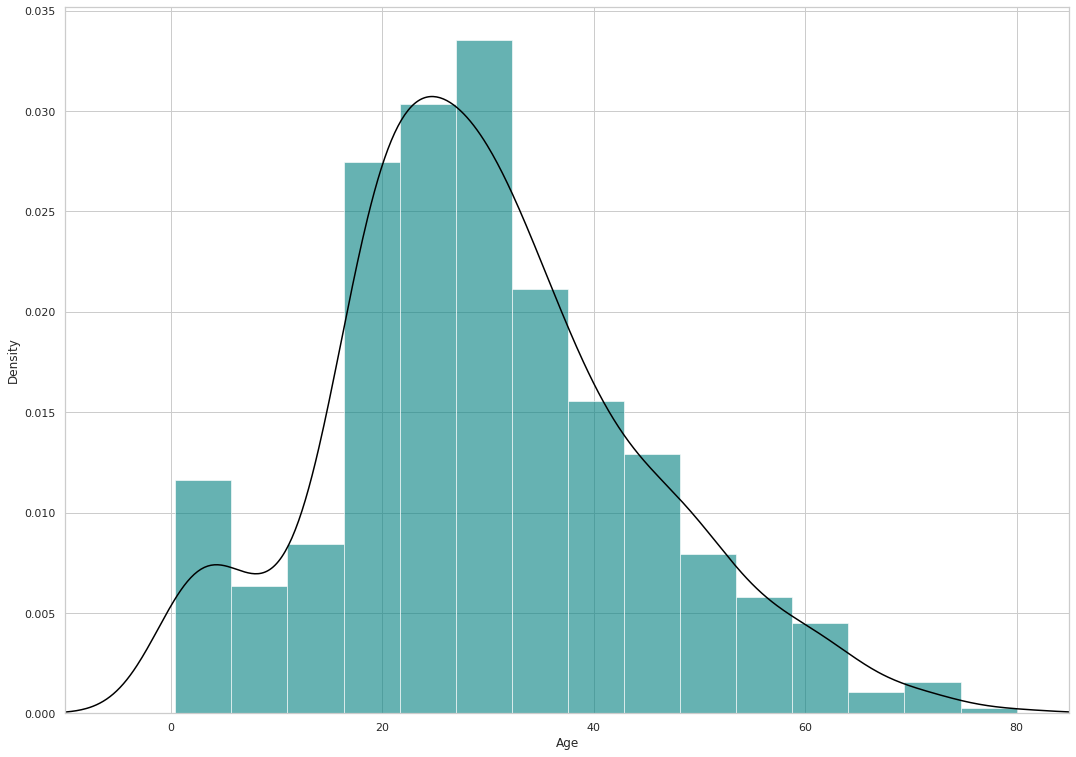

In [13]:
# Age sütunu için yoğunluk histogram grafiğini inceleyelim.

plt.figure(figsize=(18,13))
ax = train_dataFrame["Age"].hist(bins=15, density=True, stacked=True, color="teal", alpha=0.6)
train_dataFrame["Age"].plot(kind="density", color="black")
ax.set(xlabel="Age")
plt.xlim(-10, 85)
plt.show()

**Yukarıdaki grafikte görüldüğü üzere *Age* feature'u asimetrik(skewed) dağılıma sahip bir eğri olduğundan, içerisindeki 177 *missing data*'yı feature'un ortalaması ile doldurursak *yanlı* sonuçlar elde etmemiz olasıdır. Bu nedenle eksik verileri doldurmak için *medyan* kullanacağız.**

In [14]:
# Age feature'unun ortalamasını görelim
# Eksik verileri ortalamaya katmıyoruz

age_mean = train_dataFrame["Age"].mean(skipna=True)
print(f"Mean value of Age feature: {age_mean}")

Mean value of Age feature: 29.69911764705882


In [15]:
# Age feature'unun medyan değerini görelim
# Eksik verileri medyan değere katmıyoruz

age_median = train_dataFrame["Age"].median(skipna=True)
print(f"Median value of Age feature: {age_median}")

Median value of Age feature: 28.0


In [16]:
# Yukarıda da incelediğimiz üzere Cabin feature'u missing data problemine tabiidir.
# Cabin sütunu için eksik veri oranını hatırlayalım

print(f"Missing Data Ratio of Cabin Column: %{cabin_missing_data_ratio}")

Missing Data Ratio of Cabin Column: %77.10437710437711


**Görüldüğü üzere Cabin feature'unun eksik veri oranı oldukça yüksek. Eksik gözlemler herhangi bir yöntem kullanılarak doldurulsa bile elde edeceğemiz sonuç *yanlı* olacaktır. %33'lük bir veri üzerinden %77'lik bir veri oluşturmak pek de mantıklı değil. Bu nedenle eksik verileri kaldıracağız.**

In [17]:
# Yukarıda da incelediğimiz üzere Embarked feature'u missing data problemine tabiidir.
# Embarked sütunu için eksik veri oranını hatırlayalım

print(f"Missing Data Ratio of Embarked Column: %{embarked_missing_data_ratio}")

Missing Data Ratio of Embarked Column: %0.22446689113355783


**Görüldüğü üzere Embarked feature'u için eksik veri oranı yalnızca %0.2. Embarked sütununun 2 adet eksik verisi olduğunu hatırlıyoruz. Dolayısı ile bu iki eksik veriyi en fazla yolcunun bindiği liman bilgisi ile dolurabiliriz.**

In [18]:
# Embarked verisine ait bilgileri yazdıralım

embarked_value_counts = train_dataFrame["Embarked"].value_counts() 
print(embarked_value_counts)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


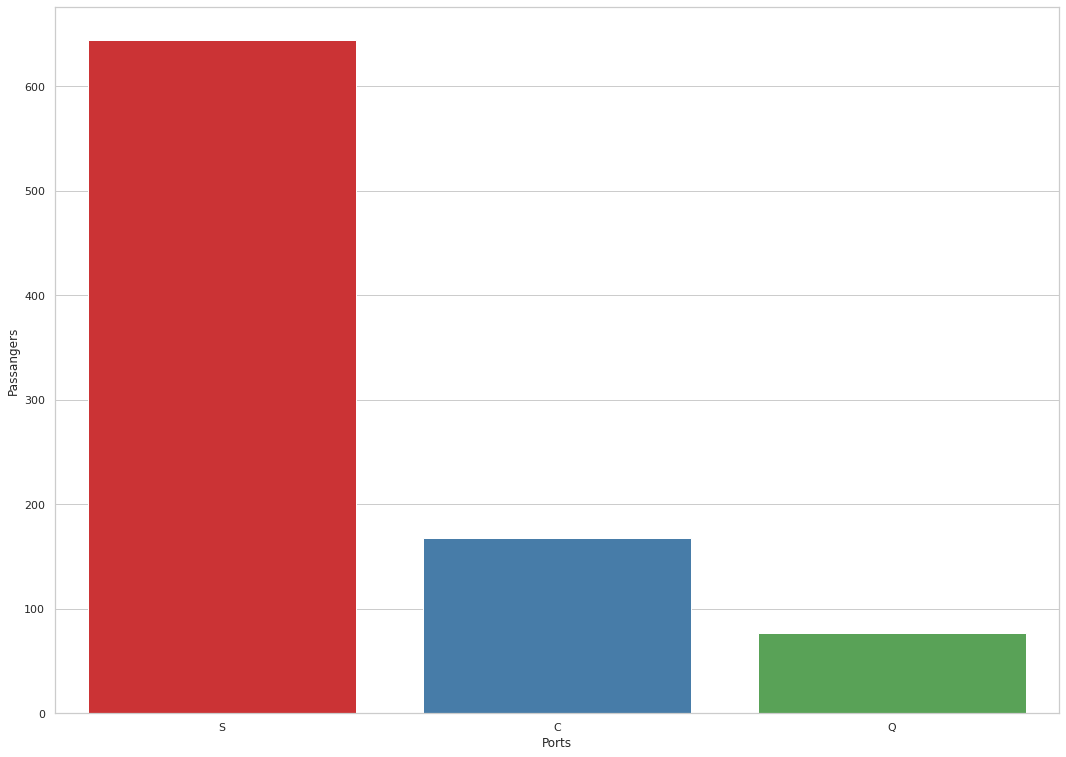

In [19]:
# Embarked - Biniş Limanı Dağılımı

plt.figure(figsize=(18,13))
sns.countplot(x="Embarked", data=train_dataFrame, palette="Set1")
plt.xlabel("Ports")
plt.ylabel("Passangers")
plt.show()

**Görüldüğü üzere en çok kullanılan biniş limanı S: Southampton, eksik olan 2 bilgiyi Southampton olarak güncelleyeceğiz**

***
**Eksik veri problemini, yukarıda bahsettiğimiz yöntemleri kullanarak çözeceğiz ancak öncesinde orijinal data frame üzerinde işlem yaparak veri kaybına sebep olmamak için bir kopya yaratalım ve işlemlerimizi onun üzerinde gerçekleştirelim.**

In [20]:
# Üzerinde çalışacağımız data frame'i oluşturalım
train_data = train_dataFrame.copy()

In [21]:
# Age feature'u içerisindeki eksik bilgileri Age feature'unun medyan değeri ile doluralım.
train_data["Age"].fillna(train_dataFrame["Age"].median(skipna=True), inplace=True)

In [22]:
# Embarked feature'u içerisindeki eksik bilgileri en fazla yolcu alınan liman bilgisi ile dolduralım
train_data["Embarked"].fillna(train_dataFrame["Embarked"].value_counts().idxmax(), inplace=True)

In [23]:
# Cabin feature'unu direk olarak data frame içerisinden çıkaralım
train_data.drop("Cabin", axis=1, inplace=True)

In [24]:
# Bu noktada elde ettiğimiz data frame'i inceleyelim
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
# Görüldüğü üzere missing data probleminin üstesinden geldik.
# Bu durumu doğrulayalım
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


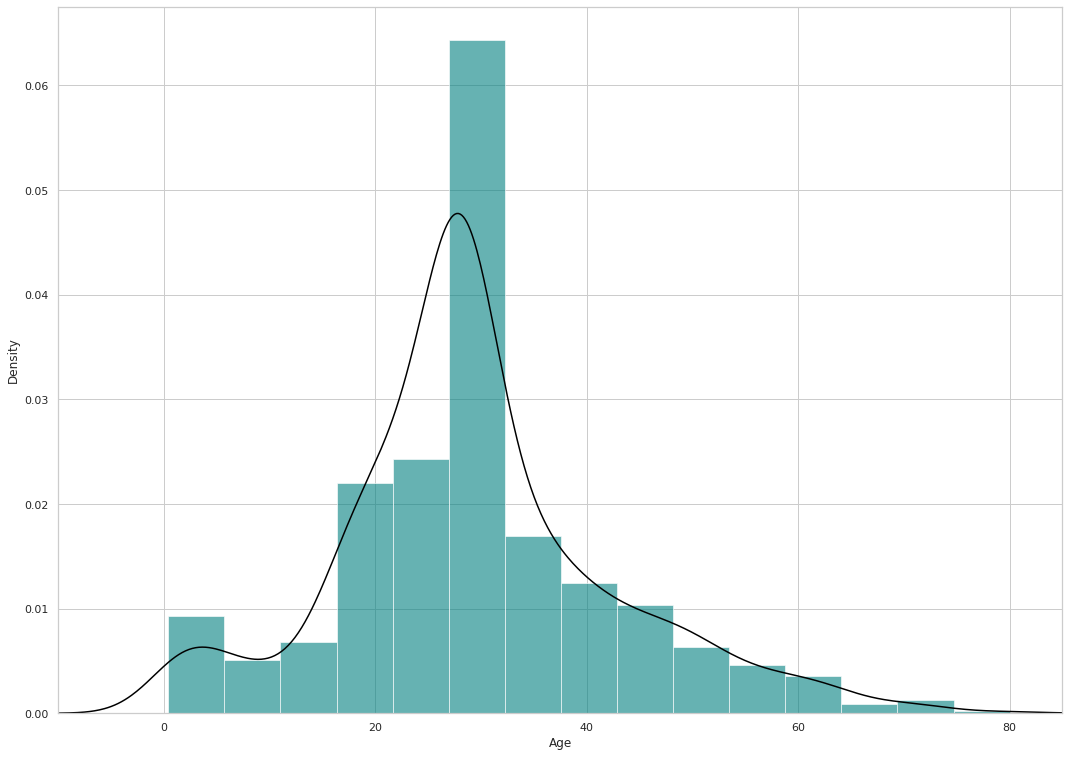

In [26]:
# Şimdi de Age feature'unun eksik veri düzenlemesinden sonraki halinin dağılım histogramını inceleyelim

plt.figure(figsize=(18,13))
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color="teal", alpha=0.6)
train_data["Age"].plot(kind="density", color="black")
ax.set(xlabel="Age")
plt.xlim(-10, 85)
plt.show()

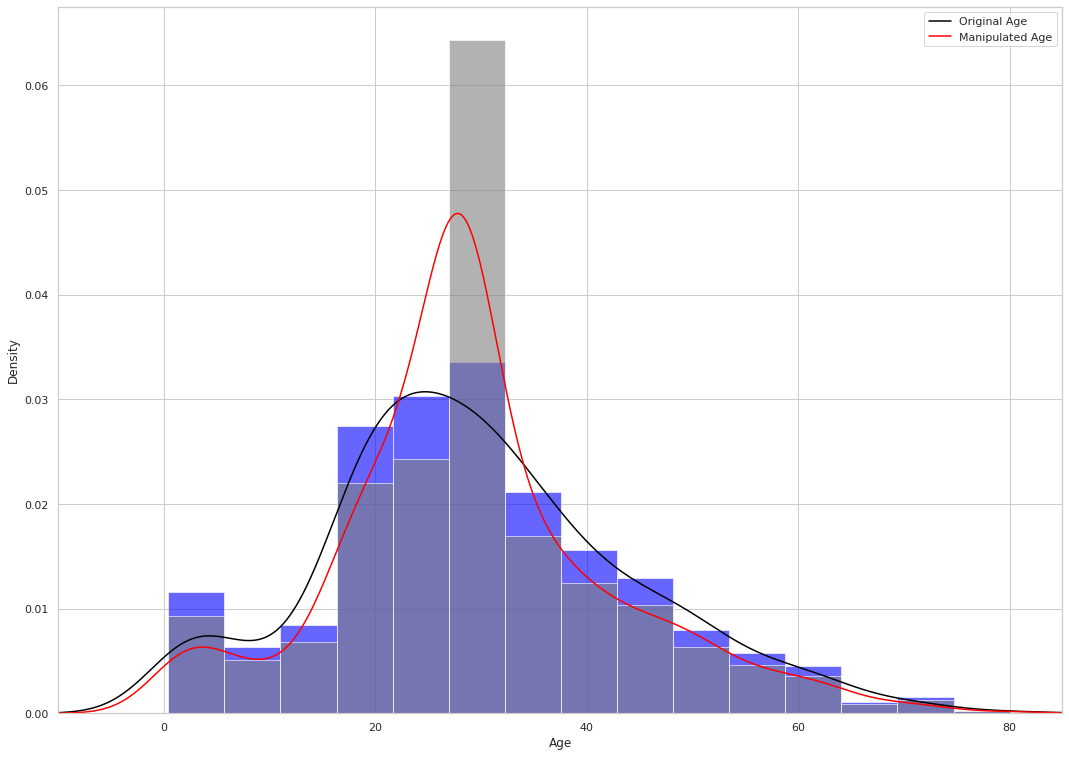

In [27]:
# Daha iyi inceleyebilmek adına Age feature'unun orijinal hali ile missing data'dan ayıklanmış halini,
# birlikte inceleyelim

plt.figure(figsize=(18,13))

ax = train_dataFrame["Age"].hist(bins=15, density=True, stacked=True, color="blue", alpha=0.6)
train_dataFrame["Age"].plot(kind="density", color="black")

ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color="gray", alpha=0.6)
train_data["Age"].plot(kind="density", color="red")

ax.legend(["Original Age", "Manipulated Age"])
ax.set(xlabel="Age")
plt.xlim(-10, 85)
plt.show()

**Görüldüğü üzere bir miktar daha simetrik ve yoğun bir veri elde ettik.**
***
**FEATURE ENGINEERING - ÖZNİTELİK MÜHENDİSLİĞİ**
* *Feature Engineering*, makine öğrenimi sürecini kolaylaştırmaya yardımcı olan ham verilerden yeni özellikler oluşturarak makine öğrenmesi algoritmalarının tahmin gücünü artırır ve daha iyi sonuçlar elde edilmesini sağlar.

* Kısacası, ham verileri seçme, değiştirme ve denetimli öğrenmede kullanılabilecek özelliklere dönüştürme ve veriyi makine öğrenmesi modellerine hazırlama sürecidir. Bildiğiniz gibi, “özellik”, tahmine dayalı bir modelde kullanılabilecek herhangi bir ölçülebilir girdidir. Bu kapsamda incelenecek başlıklar aşağıdaki gibidir.
    * Outliers (Aykırı Değerler)
    * Missing Values (Eksik Değerler)
    * Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
    * Feature Scaling (Özellik Ölçeklendirme)
    

**Veri setinde SibSp (*Kardeş* ve/veya *Eş* ile seyahat edenler) ve Parch (*Ebeveyn* ve/veya *Çocuk(lar)* ile seyahat edenler) olacak şekilde "*aile*" ile ilişkili iki *feature* mevcuttur. Bu *feature*'ların her ikisinin de aynı anda tek veri setinde bulunması, *Çokdoğrusal* (*Multicolinerity*) sorununa yol açacaktır. Hem veri setini basitleştirmek hem de bu sorunu ortadan kaldırmak için bu iki *feature*'u tek bir kategorik *feature*'a indirgemek oldukça faydalı olacaktır. Tek başına seyahat edenler ile ailesiyle seyahat edenler şeklinde bir kategorik ayrım yapmak mantıklı bir yöntemdir.**

In [28]:
# SibSp ve Parch yerine TravelAlone adlı kategorik bir feature oluşturalım
train_data["TravelAlone"]=np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)

# SibSp ve Parch feature'larını uçuralım
train_data.drop("SibSp", axis=1, inplace=True)
train_data.drop("Parch", axis=1, inplace=True)

In [29]:
# Üzerinde çalıştığımız data frame'in son halini inceleyelim
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


**info() metodu sonucunda elde ettiğimiz bilgilere göre veri setimiz içerisinde herhangi bir missing data yok ve multicolinerity sorunu da ortadan kaldırıldı. Ancak dikkat etmemiz gereken bir nokta daha var, veri seti içerisinde *object* tipinde veriler var. Bu verilere *kategorik* veriler diyoruz. Veri biliminde kategorik veriler tabiri caiz ise başa bela olabilirler. Sonuçta bu veri tipi sayısal değildir ve makine öğrenmesi temelinde matematik olduğu için bizim bu verileri sayısal olarak ifade etmemiz gerekmektedir.**

**Makine öğrenmesi modeli kurulurken biraz sonra yapacağımız gibi 3 farklı grup için 3 dummy (kukla) değişken oluşturulur. Bu işlemin yapılmasındaki amaç Multicollinearity yani çoklu bağlanım sorununu ortadan kaldırmaktır.**

**Şimdi gerekli işlemleri gerçekleştirelim.**

In [31]:
# Pclass feature'unun içerdiği sınıflar:
    # 1: Üst Sınıf
    # 2: Orta Sınıf
    # 3: Alt Sınıf
    
# Embarked feature'unun içerdiği sınıflar:
    # C: Cherbourg
    # Q: Queenstown
    # S: Southampton
    
# Sex feature'unun içerdiği sınıflar:
    # female: kadın
    # male: erkek
    
# Belirtilen bu ü. feature için dummies variable oluşturacağız

training_dummies = pd.get_dummies(train_data, columns=["Pclass", "Embarked", "Sex"])

In [32]:
# Yeni data frame içerisinde oluşan Sex_female ve Sex_male feature'larından birini sileceğiz.
# Çünkü Sex_male ya da Sex_female'den birinin 1 ya da 0 olma durumuna göre cinsiyeti belirleyebiliriz.

training_dummies.drop("Sex_female", axis=1, inplace=True)

In [33]:
# Diğer kategorik veriler olan Name ve Ticket feature'ları ile birlikte data frame'in kendi index değerleri 
# mevcut olduğu için PassengerId feature'unu da data frame'den çıkaralım. Bu feature'ların oluşturmak istediğimiz
# modele hiçbir katkısı yok.

training_dummies.drop("Name", axis=1, inplace=True)
training_dummies.drop("Ticket", axis=1, inplace=True)
training_dummies.drop("PassengerId", axis=1, inplace=True)

In [34]:
# training_dummies data frame'ini inceleyelim
training_dummies.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [35]:
# training_dummies data frame'ini inceleyelim
training_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   TravelAlone  891 non-null    int64  
 4   Pclass_1     891 non-null    uint8  
 5   Pclass_2     891 non-null    uint8  
 6   Pclass_3     891 non-null    uint8  
 7   Embarked_C   891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
 10  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 34.1 KB


In [36]:
# Görüldüğü üzere elimizde artık yalnızca sayısal veriler var.
# Data frame'in son halindeki feature isimlerini daha anlamlı hale getirelim
# columns adında bir dictionary yapısı oluşturarak değiştirmek istediğim sütun isimlerini
# ve yeni sütun isimlerini yazalım

columns = {
    "Pclass_1"   : "FirstClass",
    "Pclass_2"   : "SecondClass",
    "Pclass_3"   : "ThirdClass",
    "Embarked_C" : "Cherbourg",
    "Embarked_Q" : "Queenstown",
    "Embarked_S" : "Southampton",
    "Sex_male"   : "Male"
}

In [37]:
# Sütun isimlerini değiştirelim
training_dummies = training_dummies.rename(columns=columns)

In [38]:
# training_dummies data frame'ini inceleyelim
training_dummies.head()

,Survived,Age,Fare,TravelAlone,FirstClass,SecondClass,ThirdClass,Cherbourg,Queenstown,Southampton,Male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [39]:
# training_dummies data frame'ini inceleyelim
training_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   TravelAlone  891 non-null    int64  
 4   FirstClass   891 non-null    uint8  
 5   SecondClass  891 non-null    uint8  
 6   ThirdClass   891 non-null    uint8  
 7   Cherbourg    891 non-null    uint8  
 8   Queenstown   891 non-null    uint8  
 9   Southampton  891 non-null    uint8  
 10  Male         891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 34.1 KB


In [40]:
# Son olarak training_dummies data frame'ini final_train_dataFrame'e atayarak train verisi ile ilgili
# işlemlerimizi sonlandıralım
final_train_dataFrame = training_dummies

In [41]:
# Kontrol edelim
final_train_dataFrame.head()

,Survived,Age,Fare,TravelAlone,FirstClass,SecondClass,ThirdClass,Cherbourg,Queenstown,Southampton,Male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


***
Y
***